# What are we trying to solve?

The problem that our group chose was trying to determine the price of a wine based on information about the wine such as the variety or the region it comes from. The performance metric we are going to use is the rmse so we can see how far or close the predictions are from the actual prices on average. 

We think this problem is worthwhile because it will enable wine ethusiasts to have more knowledge on the particular blends of wines, and what they should generally be paying for them based on certain attributes.


# Collect Data

We found the data set on Kaggle. The data was scraped from WineEnthusiast with all the wine information as well as the information about the taster and the grade the taster gave it.

Dataset: https://www.kaggle.com/zynicide/wine-reviews#winemag-data-130k-v2.csv

In [4]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

In [5]:
df = pd.read_csv(r'C:\Users\Anthony\Desktop\wine\winedata.csv')
backupdf = df.copy()

# Explore Data

In [6]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [7]:
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
Unnamed: 0               129971 non-null int64
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 13.9+ MB


# Data Preprocessing

In [9]:
df.drop(['description', 'taster_twitter_handle', 'title', 'Unnamed: 0', 'designation'], axis=1, inplace = True)
df.head()

,country,points,price,province,region_1,region_2,taster_name,variety,winery
0,Italy,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,White Blend,Nicosia
1,Portugal,87,15.0,Douro,NaN,NaN,Roger Voss,Portuguese Red,Quinta dos Avidagos
2,US,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Pinot Gris,Rainstorm
3,US,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,Riesling,St. Julian
4,US,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Pinot Noir,Sweet Cheeks


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 9 columns):
country        129908 non-null object
points         129971 non-null int64
price          120975 non-null float64
province       129908 non-null object
region_1       108724 non-null object
region_2       50511 non-null object
taster_name    103727 non-null object
variety        129970 non-null object
winery         129971 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 8.9+ MB


In [11]:
df.dropna(inplace = True)

In [12]:
df.describe()

,points,price
count,34559.000000,34559.000000
mean,89.049220,36.615643
std,2.812346,26.699977
min,80.000000,4.000000
25%,87.000000,20.000000
50%,89.000000,30.000000
75%,91.000000,45.000000
max,100.000000,2013.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029064840D08>,
      dtype=object)

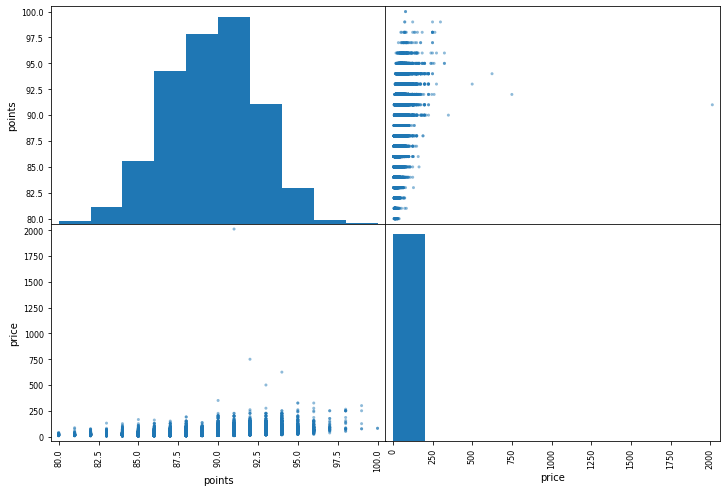

In [13]:
from pandas.plotting import scatter_matrix

attributes = ["points", "price"]
scatter_matrix(df[attributes], figsize=(12, 8))

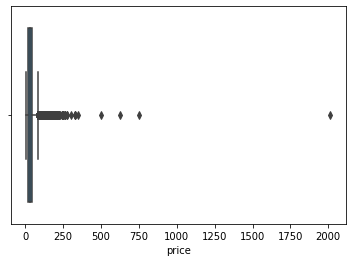

In [14]:
# notice massive outlier for price
import seaborn as sns

sns.boxplot(x=df['price'])

In [15]:
df = df[np.abs(df.price-df.price.mean())<=(3*df.price.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
df = df[~(np.abs(df.price-df.price.mean())>(3*df.price.std()))]

In [16]:
df.describe()

,points,price
count,33627.000000,33627.000000
mean,88.961727,33.960716
std,2.770466,17.341728
min,80.000000,4.000000
25%,87.000000,20.000000
50%,89.000000,30.000000
75%,91.000000,45.000000
max,100.000000,90.000000


In [17]:
df['country'].value_counts()

US    33627
Name: country, dtype: int64

In [18]:
df.drop(['country'], axis=1, inplace=True)

In [19]:
df['province'].value_counts()

California    17662
Washington     8462
Oregon         4922
New York       2581
Name: province, dtype: int64

In [20]:
df['variety'].value_counts()

Pinot Noir                      6146
Chardonnay                      3985
Cabernet Sauvignon              3556
Syrah                           2218
Red Blend                       2015
                                ... 
Nero d'Avola                       1
Negroamaro                         1
Muscat Blanc à Petits Grains       1
Tinta Amarela                      1
Muscat d'Alexandrie                1
Name: variety, Length: 219, dtype: int64

In [21]:
df_sub = df[df.groupby('variety').variety.transform('count')>100]

In [22]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31641 entries, 2 to 129967
Data columns (total 8 columns):
points         31641 non-null int64
price          31641 non-null float64
province       31641 non-null object
region_1       31641 non-null object
region_2       31641 non-null object
taster_name    31641 non-null object
variety        31641 non-null object
winery         31641 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 2.2+ MB


In [23]:
df_sub['winery'].value_counts()

Chateau Ste. Michelle    191
Columbia Crest           146
Testarossa               111
Maryhill                  94
Seven Hills               92
                        ... 
District 7 Wines           1
a-non-ah-mus               1
Vitesse                    1
Maggio                     1
Enos Vineyard              1
Name: winery, Length: 3604, dtype: int64

In [24]:
df_sub2 = df_sub[df_sub.groupby('winery').winery.transform('count')>25]

In [25]:
df_sub2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12590 entries, 10 to 129935
Data columns (total 8 columns):
points         12590 non-null int64
price          12590 non-null float64
province       12590 non-null object
region_1       12590 non-null object
region_2       12590 non-null object
taster_name    12590 non-null object
variety        12590 non-null object
winery         12590 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 885.2+ KB


In [26]:
df_sub2['region_1'].value_counts()

Columbia Valley (WA)                    2393
Finger Lakes                            1004
Willamette Valley                        940
Russian River Valley                     546
Walla Walla Valley (WA)                  510
                                        ... 
Monterey-Santa Cruz                        1
Templeton Gap District                     1
Sonoma County-Monterey County              1
Carneros-Napa Valley                       1
Moon Mountain District Sonoma County       1
Name: region_1, Length: 124, dtype: int64

In [27]:
df_sub3 = df_sub2[df_sub2.groupby('region_1').region_1.transform('count')>100]

In [28]:
df_sub3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10492 entries, 10 to 129927
Data columns (total 8 columns):
points         10492 non-null int64
price          10492 non-null float64
province       10492 non-null object
region_1       10492 non-null object
region_2       10492 non-null object
taster_name    10492 non-null object
variety        10492 non-null object
winery         10492 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 737.7+ KB


In [29]:
df_sub3["region_2"].value_counts()

Columbia Valley      4326
Willamette Valley    1470
Central Coast        1051
Finger Lakes         1004
Sonoma               1002
Sierra Foothills      394
Long Island           194
Napa                  170
Oregon Other          160
California Other      159
Central Valley        153
Southern Oregon       147
Washington Other      147
Napa-Sonoma           115
Name: region_2, dtype: int64

In [30]:
df_sub3["taster_name"].value_counts()

Paul Gregutt          3947
Sean P. Sullivan      2281
Virginie Boone        1504
Anna Lee C. Iijima    1073
Matt Kettmann          932
Jim Gordon             593
Susan Kostrzewa         96
Joe Czerwinski          30
Michael Schachner       26
Lauren Buzzeo           10
Name: taster_name, dtype: int64

In [31]:
df_sub4 = df_sub3[df_sub3.groupby('taster_name').taster_name.transform('count')>40]

In [32]:
df_sub4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10426 entries, 10 to 129927
Data columns (total 8 columns):
points         10426 non-null int64
price          10426 non-null float64
province       10426 non-null object
region_1       10426 non-null object
region_2       10426 non-null object
taster_name    10426 non-null object
variety        10426 non-null object
winery         10426 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 733.1+ KB


In [33]:
df = df_sub4.copy()
df.head()

,points,price,province,region_1,region_2,taster_name,variety,winery
10,87,19.0,California,Napa Valley,Napa,Virginie Boone,Cabernet Sauvignon,Kirkland Signature
67,86,46.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,Bordeaux-style Red Blend,Basel Cellars
94,88,22.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,Viognier,Gård
97,88,20.0,New York,Finger Lakes,Finger Lakes,Anna Lee C. Iijima,Riesling,Heron Hill
101,87,20.0,New York,Finger Lakes,Finger Lakes,Anna Lee C. Iijima,Riesling,Lamoreaux Landing


In [34]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [35]:
wine = train_set.drop("price", axis=1) # drop labels for training set
wine_labels = train_set["price"].copy()

In [36]:
numericals = wine.drop(['province', 'region_2', 'variety', 'winery', 'region_1', 'taster_name'], axis=1)
numericals

,points
119317,88
56414,91
94474,87
65982,88
92548,87
...,...
73540,88
66639,86
69181,87
11204,94


In [37]:
wine

,points,province,region_1,region_2,taster_name,variety,winery
119317,88,California,Russian River Valley,Sonoma,Virginie Boone,Rhône-style White Blend,Davis Family
56414,91,California,Russian River Valley,Sonoma,Virginie Boone,Chardonnay,Gary Farrell
94474,87,New York,Finger Lakes,Finger Lakes,Anna Lee C. Iijima,Sauvignon Blanc,Billsboro
65982,88,Washington,Yakima Valley,Columbia Valley,Sean P. Sullivan,Merlot,DeLille
92548,87,New York,North Fork of Long Island,Long Island,Susan Kostrzewa,Meritage,Osprey's Dominion
...,...,...,...,...,...,...,...
73540,88,Oregon,Dundee Hills,Willamette Valley,Paul Gregutt,Pinot Noir,Lange
66639,86,California,El Dorado,Sierra Foothills,Virginie Boone,Zinfandel,Lava Cap
69181,87,New York,Finger Lakes,Finger Lakes,Anna Lee C. Iijima,Gewürztraminer,Keuka Spring
11204,94,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,Cabernet Sauvignon,Dumas Station


In [38]:
wine_labels

119317    30.0
56414     60.0
94474     16.0
65982     49.0
92548     35.0
          ... 
73540     60.0
66639     22.0
69181     22.0
11204     60.0
92676     50.0
Name: price, Length: 8340, dtype: float64

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

num_pipeline = Pipeline([
    ('minmax_scaler', MinMaxScaler()),
])

In [40]:
from sklearn.compose import ColumnTransformer

num_attribs = list(numericals)
cat_attribs = ['province', 'region_2', 'variety', 'winery', 'region_1', 'taster_name']

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

In [41]:
wine_prepared = full_pipeline.fit_transform(wine)

In [42]:
wine_prepared

<8340x383 sparse matrix of type '<class 'numpy.float64'>'
	with 58376 stored elements in Compressed Sparse Row format>

# Establish Baseline

The baseline we used was the average price of a wine bottle.

In [43]:
#Baseline
baseline = train_set['price']
baseline.describe()

count    8340.000000
mean       33.778417
std        17.039941
min         7.000000
25%        20.000000
50%        30.000000
75%        45.000000
max        90.000000
Name: price, dtype: float64

In [44]:
baseline_mse = (baseline-33.77)**2
baseline_rmse = baseline_mse**.5
baseline_rmse_avg = baseline_rmse.mean()
baseline_rmse_avg

13.943640287769908

# Train and Select Model

In [45]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(wine_prepared, wine_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
# testing on a few instances
data = wine.iloc[:5]
labels = wine_labels.iloc[:5]
data_prepared = full_pipeline.transform(data)

In [47]:
print("Predictions:", lin_reg.predict(data_prepared))
print("Labels:", list(labels))

Predictions: [33.59772114 45.38641621 14.53068003 46.09402454 37.89658195]
Labels: [30.0, 60.0, 16.0, 49.0, 35.0]


In [48]:
from sklearn.metrics import mean_squared_error

wine_predictions = lin_reg.predict(wine_prepared)
lin_mse = mean_squared_error(wine_labels, wine_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

9.295231831087497

In [49]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(wine_prepared, wine_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [50]:
wine_predictions = tree_reg.predict(wine_prepared)
tree_mse = mean_squared_error(wine_labels, wine_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

4.089626646281096

In [51]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, wine_prepared, wine_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [52]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [11.19334339 11.28313053 10.59943222 11.39960435 12.01426932 11.43021359
 11.79498587 11.23367869 11.91099951 12.12582451]
Mean: 11.498548198412902
Standard deviation: 0.44158972741964286


In [53]:
lin_scores = cross_val_score(lin_reg, wine_prepared, wine_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 9.71092562  9.70775888  9.58438828  9.4286239  10.11859207  9.61916514
  9.8097189   9.91975165  9.93579983  9.52278241]
Mean: 9.735750668673585
Standard deviation: 0.20087303818930333


In [54]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(wine_prepared, wine_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [55]:
wine_predictions = forest_reg.predict(wine_prepared)
forest_mse = mean_squared_error(wine_labels, wine_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

5.03051054222279

In [56]:
forest_scores = cross_val_score(forest_reg, wine_prepared, wine_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [ 9.61070347  9.71725485  9.20737425  9.50578411 10.40937451  9.82664036
  9.8163501   9.63981866 10.12472564 10.15097254]
Mean: 9.800899846655557
Standard deviation: 0.33272225016801593


In [58]:
print("Predictions:", forest_reg.predict(data_prepared))
print("Labels:", list(labels))

Predictions: [30.0285     54.09690476 16.295      41.915      31.75      ]
Labels: [30.0, 60.0, 16.0, 49.0, 35.0]


In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = [
 {'n_estimators': [120, 125, 130], 'max_features': [3, 4, 5, 6]},
 ]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, refit=True)
grid_search.fit(wine_prepared, wine_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [3, 4, 5, 6],


In [66]:
grid_search.best_params_

{'max_features': 3, 'n_estimators': 120}

In [67]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=120,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [68]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

9.184912983025951 {'max_features': 3, 'n_estimators': 120}
9.228635378789942 {'max_features': 3, 'n_estimators': 125}
9.203835726377134 {'max_features': 3, 'n_estimators': 130}
9.193219834127886 {'max_features': 4, 'n_estimators': 120}
9.201446892886082 {'max_features': 4, 'n_estimators': 125}
9.1961472190976 {'max_features': 4, 'n_estimators': 130}
9.217000978447196 {'max_features': 5, 'n_estimators': 120}
9.211417014319046 {'max_features': 5, 'n_estimators': 125}
9.219097943524863 {'max_features': 5, 'n_estimators': 130}
9.219429537901298 {'max_features': 6, 'n_estimators': 120}
9.186093068334433 {'max_features': 6, 'n_estimators': 125}
9.192057897669645 {'max_features': 6, 'n_estimators': 130}


In [69]:
final_model = grid_search.best_estimator_
X_test = test_set.drop("price", axis=1)
y_test = test_set["price"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [70]:
final_rmse

9.25606678173746

In [71]:
print("Predictions:", final_model.predict(data_prepared))
print("Labels:", list(labels))

Predictions: [31.03125    53.16458333 16.21777778 43.2        31.24166667]
Labels: [30.0, 60.0, 16.0, 49.0, 35.0]


In [72]:
print("Predictions:", final_predictions[50:60:2])
print("Labels:", list(y_test[50:60:2]))

Predictions: [18.35506614 46.60333333 29.14111111 43.90138889 27.91944444]
Labels: [20.0, 49.0, 25.0, 50.0, 30.0]


# Maintain, monitor and deploy

To maintain this model, we can continually scrape data and retrain the model incrementally on more new and relevant data. As time progresses, there might be new wineries/regions that will need to be accounted for.

# Conclusions

We determined after finishing this project that the dataset we worked with could have been a little better, as there weren't many strong positive or negative correlations between the price we were predicting and any of the attributes. That being said, with the data we had, we were able to get significantly better results using machine learning than our baseline, so it seems to be worthwile. In the future, we might be able to add more attributes about the wines that are more strongly correlated with the price. These can range from things such as alcohol content, Ph, sugars, etc. We could also make a parser that gets keywords from the description column that we dropped, and see if certain adjectives used to describe the wines influence the price.